In [4]:
import pickle
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
# Trace builiding code
class Trace:
    def __init__(self):
        self.calls = []

class Node_info:
    def __init__(self, num_id, n_type):
        self.num_id = num_id
        self.n_type = n_type

class Call:
    def __init__(self, traceid, timestamp, rpcid, um, dm, rpctype, interface, rt):
        self.traceid = traceid
        self.timestamp = timestamp
        self.rpcid = rpcid
        self.um = um
        self.dm = dm 
        self.rpctype = rpctype
        self.interface = interface
        self.rt = rt
    def string(self):
        return self.traceid + "," + str(self.timestamp) + "," + self.rpcid + "," + self.um + "," + self.dm + "," +\
            self.rpctype + "," + self.interface + "," + str(self.rt)

def csv_to_df(file: str):
    use_columns = list(range(9)) 
    df = pd.read_csv(file,delimiter=',', usecols=use_columns)
    return df

def extract_traceid_rows(df, tid):
    f_df = df[df['traceid'] == tid]
    tid_calls = [
        Call(
            str(row.traceid), 
            int(row.timestamp), 
            str(row.rpcid), 
            str(row.um), 
            str(row.dm), 
            str(row.rpctype), 
            str(row.interface), 
            int(row.rt)
        ) for row in f_df.itertuples(index=False)
    ]
    return tid_calls

def build_digraph(df, tids_list):
    '''
    Builds digraph. 
    Args: df= list of trace rows, list of tids to build and add
    Returns: A full di graph with tids given.
    '''
    t_edges = []
    for i in range(len(tids_list)):
        tid_calls = extract_traceid_rows(df, tids_list[i])
         # list of edges of trace
        for call in tid_calls:
            t_edges.append([call.um, call.dm])
    G = nx.DiGraph()
    G.add_edges_from(t_edges)
    return G

In [30]:
df = csv_to_df("./casper_rebuild.csv")

# Extract all tids
tids_list = df['traceid'].unique()
num_traces = len(tids_list)
print("Num of tids: ", num_traces)

Num of tids:  10421


In [31]:
# Building the full original digraph
G_original = build_digraph(df, tids_list)

In [5]:
'''
Read & Build Sampled graphs
'''

with open('downsampled_graphs/500nodes_500traces.pkl', 'rb') as pkl_file:
    T_prime = pickle.load(pkl_file)
out = dict(itertools.islice(T_prime.items(), 1)) 
print(type(T_prime))
print(out)


<class 'dict'>
{'0b142b4715919389389027000ed191': [('c55ff3aa2e4cb4760850377d3135c955182b9924dddd6f0b799098733826eb94', 'b58ba81e712e15281eb93074ed026a844f5100024d91b25f2742b5d5e8bedd9f'), ('c55ff3aa2e4cb4760850377d3135c955182b9924dddd6f0b799098733826eb94', '7695b43b41732a0f15d3799c8eed2852665fe8da29fd700c383550fc16e521a3'), ('b58ba81e712e15281eb93074ed026a844f5100024d91b25f2742b5d5e8bedd9f', 'b58ba81e712e15281eb93074ed026a844f5100024d91b25f2742b5d5e8bedd9f'), ('b58ba81e712e15281eb93074ed026a844f5100024d91b25f2742b5d5e8bedd9f', '091d902a832e3675d674c27855801421f04b9f2c7354b75e723805321e60fd3e'), ('091d902a832e3675d674c27855801421f04b9f2c7354b75e723805321e60fd3e', '7695b43b41732a0f15d3799c8eed2852665fe8da29fd700c383550fc16e521a3'), ('95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772d7b08a68eb5214dc44', '95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772d7b08a68eb5214dc44'), ('95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772d7b08a68eb5214dc44', '0b0c981da8042a436f30f7d9f7cce74360abe630bd547850168

In [32]:
def plot_cdf(data, label):
    x_vals = np.sort(data)
    y_vals = np.arange(len(data))/float(len(data))
    plt.plot(x_vals, y_vals, label=label)


In [40]:
'''
Graph Similarity Metrics
In & Out degree distribution
'''

def deg_dist_viz(Gs_and_labels, in_or_out):
    '''
    Generates a CDF graph for in/out deg dist of graphs
    Args: Gs_and_label= list of graphs and their labels,
          in_or_out= 'in' or 'out'
    '''
    for G, label in Gs_and_labels:
        if in_or_out == 'in':
            degrees = G.in_degree(G.nodes())
        elif in_or_out == 'out':
            degrees = G.out_degree(G.nodes())
        deg_dist = [tup[1] for tup in list(degrees)]
        x_vals = np.sort(deg_dist)
        y_vals = np.arange(len(deg_dist))/float(len(deg_dist))
        plt.plot(x_vals, y_vals, label=label)
    if in_or_out == "in":
        plt.xlabel('In-degree')
    elif in_or_out == "out":
        plt.xlabel('Out-degree')
    plt.ylabel('CDF')
    plt.legend()
    plt.tight_layout()
    plt.show()
# Kolmogrov D Statistic

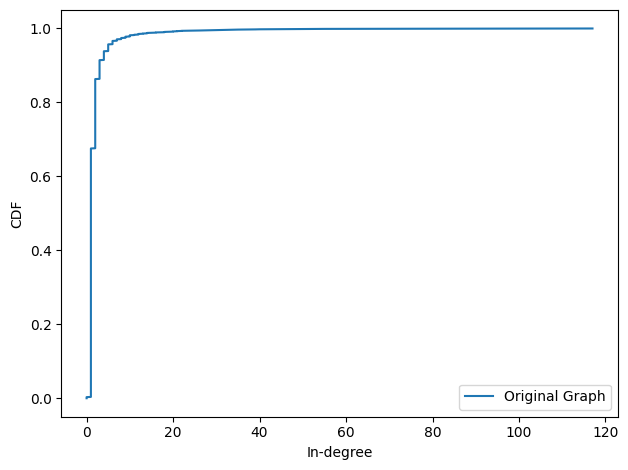

In [41]:
deg_dist_viz([[G_original, 'Original Graph']], 'in')

In [ ]:
'''
Graph Kernel Similarity Score
'''

In [ ]:
'''
Loss of Edges
Baseline: Original Graph
For a fixed n nodes, we get number of edges lost for
different t' values. X:t', Y:num of edges
'''

